In [153]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

Take a brief look on our data

In [154]:
df = pd.read_csv('survey_results_public.csv',encoding="utf-8")
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


As we can see most of our data is in object data type
Our task will answer three of these question: 


1.   How do people learn code ?
2.   What is the most using programming language, framework, tool, eduacation level?
3.   Same two question above but with Data Scientist ?




In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [156]:
(df.isna().sum()/len(df)).sort_values(ascending=False)

VCHostingProfessional use         1.000000
VCHostingPersonal use             1.000000
LearnCodeCoursesCert              0.598884
OfficeStackAsyncWantToWorkWith    0.562265
Frequency_3                       0.528921
                                    ...   
LearnCode                         0.023039
Employment                        0.021278
Country                           0.020432
MainBranch                        0.000000
ResponseId                        0.000000
Length: 79, dtype: float64

To find the most common languauge that a developer have we need to inspect the columns "LanguageHaveWorkedWith"

In [157]:
all_lang = []
for val in df["LearnCode"].dropna():
  all_lang += val.split(";")
  
lang = dict(Counter(all_lang))
lang_df = pd.DataFrame.from_dict(lang,orient='index')
top_10_lang = lang_df.sort_values(0,ascending=False)[:10]


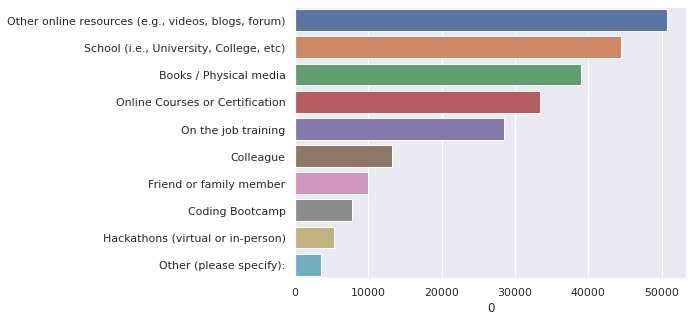

In [158]:
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(
    data=top_10_lang, y=top_10_lang.index, x=0,
    capsize=.4, errcolor=".5", orient = 'h')


In [170]:
#our code seem to be reusable so i will packed it up as function, this funtion will provide statistic results in term of frequency for our dataset 
def plot_freq_value(df,col_name, splitter, top_val ):
  all_lang = []
  for val in df[col_name].dropna():
    all_lang += val.split(splitter)
  lang = dict(Counter(all_lang))
  lang_df = pd.DataFrame.from_dict(lang,orient='index').sort_values(0,ascending=False)[:top_val]
  sns.set(rc={'figure.figsize':(10,8)})
  ax = sns.barplot(
      data=lang_df, y=lang_df.index, x=0,
      capsize=.4, errcolor=".5", orient = 'h')
  return ax


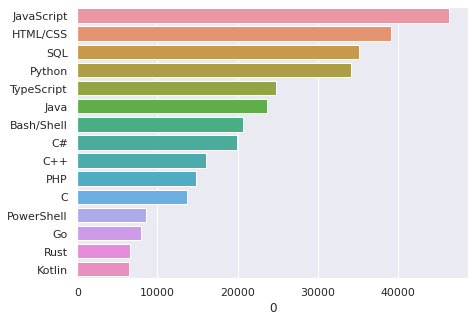

In [160]:
plot_freq_value(df,"LanguageHaveWorkedWith",";", 15)

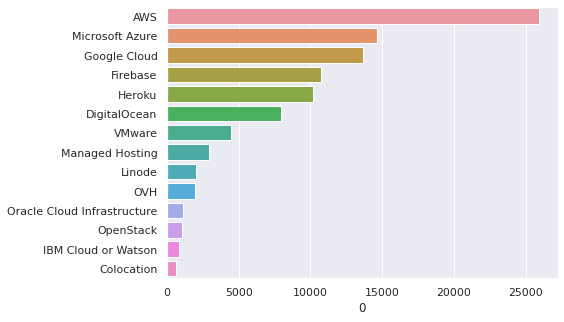

In [161]:
plot_freq_value(df,"PlatformHaveWorkedWith",";", 35)

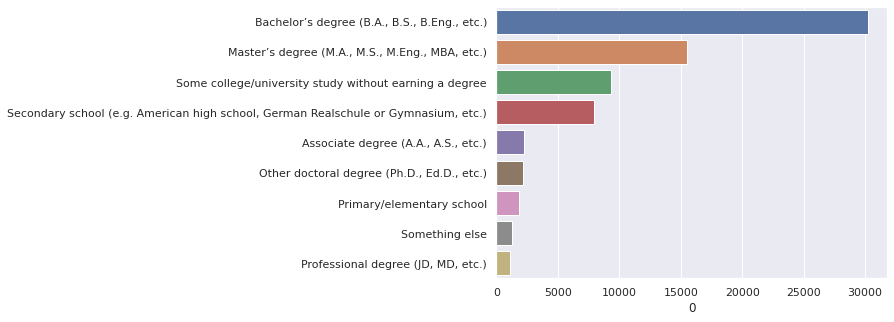

In [162]:
plot_freq_value(df,"EdLevel",";", 35)

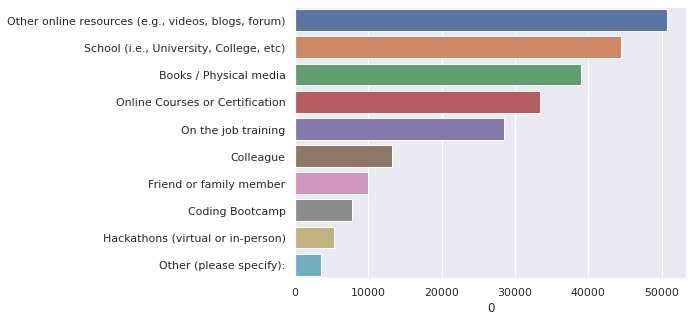

In [163]:
plot_freq_value(df,"LearnCode",";", 35)

In [164]:
#create dummy column for DS
title= "Data scientist or machine learning specialist"
df= df.dropna(subset=['DevType'])
dummies = df['DevType'].map(lambda row: title in row)
dummies

2         True
3        False
4        False
7        False
8        False
         ...  
73263    False
73264     True
73265    False
73266    False
73267    False
Name: DevType, Length: 61302, dtype: bool

In [165]:
#Now we only select where record who is data scientist 
df['DStype'] = dummies
ds_df = df[df['DStype']==True]
ds_df.shape 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(3424, 80)

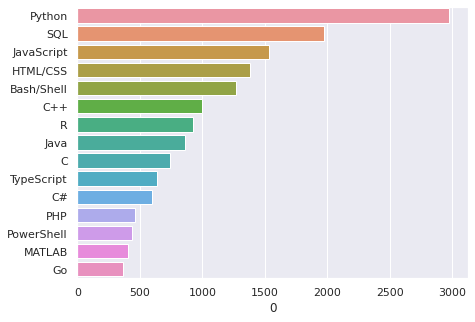

In [166]:
plot_freq_value(ds_df,"LanguageHaveWorkedWith",";", 15)

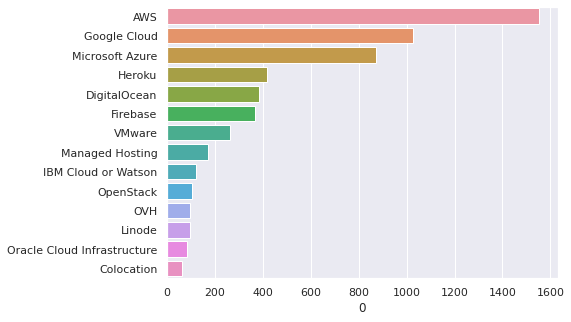

In [167]:
plot_freq_value(ds_df,"PlatformHaveWorkedWith",";", 35)

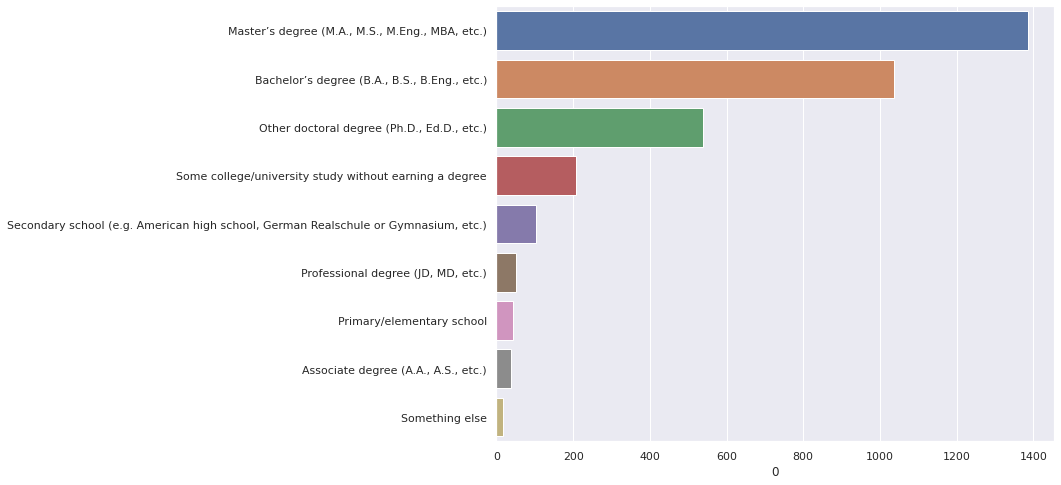

In [171]:
plot_freq_value(ds_df,"EdLevel",";", 35)

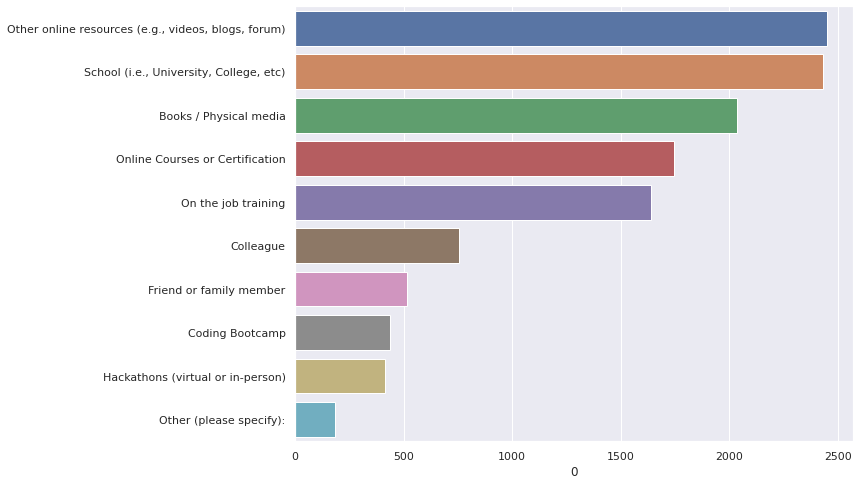

In [172]:
plot_freq_value(ds_df,"LearnCode",";", 35)